# C++ for Python Programmers Assessment

All code was tested in a C++ 17 kernel using jupyter notebook version 6.4.8 on linux system 20.04.2 LTS.

c++ version is c++ (Ubuntu 9.4.0-1ubuntu1~20.04) 9.4.0.

## Task 1

Write a C++ implementation of the Fundamental Algorthim

In [1]:
#include <iostream>
#include <unordered_map>
#include <vector>
#include <list>
#include <string>
#include <algorithm> //randomshuffle

## The Fundamental Algorithm

#### Function Description (for Replicability)

##### Purpose:
This function implements the fundamental algorithm (as described on page 9) and its aim is to find a stable matching for a given pair of preference tables.

##### Inputs:
A pair of preference tables (2 unordered maps)

##### Method:
* Create initial lists of men and women
* Create initial unordered map of matchings. All females are temporariliy engaged to the very undesirable man denoted by "omega"
* Add "omega" to the end of the list of preference of each woman
* Implement psuedo code of the fundamental algorithm (as described on page 9)

In [2]:
std::unordered_map<std::string, std::string> fundamental_algorithm(std::unordered_map<std::string, std::vector<std::string>> p1,std::unordered_map<std::string,std::vector<std::string>>p2)
    {
    //set-up list of males and females 
    std::vector<std::string> men = p2.begin()->second;
    std::vector<std::string> women = p1.begin()->second;
    
    // all women temporariliy engaged to the undesirable man
    //hence initial matchings are:
    std::unordered_map<std::string, std::string> m;
    
    for (const auto& i:women)
    {
        m[i] = "omega";
    }
    
    int k = 0;
    int n = p2.size();
    
    //add omega to end of list of preferences for each woman
    for (auto i : p2){
        p2.at(i.first).push_back("omega");
    }
    
    
    //while not all men have matches
    while (k<n){
        std::string X = men[k];
            while (X!="omega"){
                // X's list of preferences
                std::vector<std::string> preference_list = p1[X];
                
                //get best choice
                std::string x = preference_list[0];
                
                //currnet partner (fiance) of women x is:
                std::string h = m[x];
                
                //find index of current partner
                auto i = std::find(p2[x].begin(), p2[x].end(), h);
                int current_index = std::distance(p2[x].begin(),i);
                
                //find index of new potential partner
                i = std::find(p2[x].begin(), p2[x].end(), X);
                int potential_index = std::distance(p2[x].begin(),i);
                
                //if women prefers new man then engage them
                if (potential_index < current_index)
                {
                    m[x]=X;
                    // X becomes preceeding fiance of x
                    X = h;
                }
                
                if (X != "omega")
                {
                    //withdraw x from X's list
                    p1[X].erase(p1[X].begin());
                }
            }
        k = k+1;
        }
    return m;
}
                
        


## Demonstration 1
I checked the out-put of my implementation of the fundamental algorithm using the preference tables given in page 1 of the paper. The code below verifies that the mathing determined for the 4x4 preference table is stable as shown in the book.

Step 1: Set up the preference tables given in Lecture 1 page 1 of the Stable Marriage and its Relation to other Combinatorial Problems as unordered maps

In [3]:
std::unordered_map <std::string, std::vector<std::string>> p1; //male prefernece table
std::unordered_map <std::string, std::vector<std::string>> p2; //female preference table

In [4]:
p1["A"] = {"c","b","d","a"};
p1["B"] = {"b","a","c","d"};
p1["C"] = {"b","d","a","c"};
p1["D"] = {"c","a","d","b"};

(std::vector &) { "c", "a", "d", "b" }


In [5]:
p2["a"] = {"A","B","D","C"};
p2["b"] = {"C","A","D","B"};
p2["c"] = {"C","B","D","A"};
p2["d"] = {"B","A","C","D"};

(std::vector &) { "B", "A", "C", "D" }


Step 2: Run the fundamental algorithm function with the above preference tables. The stable matching produced should be {Ad, Ba, Cb, Dc} as shown in Lecture 1 page 2 of the Stable Marriage Problem and Its Relation to other Combinatorial Problems

In [6]:
fundamental_algorithm(p1,p2)

(std::unordered_map<std::string, std::string>) { "c" => "D", "d" => "A", "a" => "B", "b" => "C" }


## Demonstration 2


Step 1: Set up the preference tables as given in Lecture 1 page 3 of the Stable Marriage Problem and its Relation to other Combinatorial Problems as unordered maps.

In [7]:
std::unordered_map <std::string, std::vector<std::string>> p3; //male prefernece table
std::unordered_map <std::string, std::vector<std::string>> p4; //female preference table

In [8]:
p3["A"] = {"a","b","c","d","e"};
p3["B"] = {"b","c","d","e","a"};
p3["C"] = {"c","d","e","a","b"};
p3["D"] = {"d","e","a","b","c"};
p3["E"] = {"e","a","b","c","d"};

(std::vector &) { "e", "a", "b", "c", "d" }


In [9]:
p4["a"] = {"B","C","D","E","A"};
p4["b"] = {"C","D","E","A","B"};
p4["c"] = {"D","E","A","B","C"};
p4["d"] = {"E","A","B","C","D"};
p4["e"] = {"A","B","C","D","E"};

(std::vector &) { "A", "B", "C", "D", "E" }


Step 2: Run the fundamental algorithm function with the above preference tables. There are 5 possible stable matchings given on page 3, these are:
- {Aa, Bb, Cc, Dd, Ee}
- {Ab, Bc, Cd, De, Ea}
- {Ac, Bd, Ce, Da, Eb}
- {Ad, Be, Ca, Db, Ec}
- {Ae, Ba, Cb, Dc, Ed}

We conclude that the implementation of the fundamental algorithm is correct if one of these stable matches is produced.

In [10]:
fundamental_algorithm(p3,p4)

(std::unordered_map<std::string, std::string>) { "c" => "C", "b" => "B", "d" => "D", "a" => "A", "e" => "E" }


## Task 2 

Based on the type of data strctures you have used in your solution to Task1, determine the computational complexity of your algorithm

### Answer
Time complexity analysis

 - Line 1-3: $3$ operations all of constant time
 - Followed by 2 for loops of size $n$ so $2n$
 - double while loop of size $n$ so $n^2$
 - $12$ operations inside double while loop, $10$ of which are of constant time
 - The other $2$ consist of $2$ std::find operations that each have complexity $O(log(n))$
 
 
Therefore, the computational complexity of the algorithm is $n^2(10+2log(n))+2n+3$.

In big $O$ notation, the computational complexity of the algorithm is therefore $O(n^2log(n)).$

## Task 3

Modify fundamental algorithm so that it takes an integer number (say t) creates some example preference tables within the function and then uses the fundamnetal algorithm to determine a stable marriage

In [11]:
typedef std::unordered_map <std::string, std::vector<std::string>> preference_table_type;
typedef std::unordered_map <std::string, std::string> matching_type;

In [12]:
std::tuple<preference_table_type, preference_table_type, matching_type> fundamental_algorithm_new(int t)
    {
    
    //create 2 lists for men and women
    std::vector<std::string> men;
    std::vector<std::string> women;
    std::string s;
    
    for (int i=1; i<=t; i++) {
        
        s = std::to_string(i); //from stackoverflow
        men.push_back("M"+s);
        women.push_back("F"+s);
    }
    
    
    //create empty preference tables called p5 (p1) and p6 (p2)
    
    std::unordered_map <std::string, std::vector<std::string>> p5; //male preference table
    std::unordered_map <std::string, std::vector<std::string>> p6; //female preference table
    
    //male preference table
    
    for (auto i : men)
    {
        std::random_shuffle(women.begin(), women.end());
        p5[i] = women;
    }
    
    //female preference table
    
    for (auto i : women)
    {
        std::random_shuffle(men.begin(), men.end());
        p6[i] = men;
    }
    
    //make copies of original preference tables so can output them 
    std::unordered_map <std::string, std::vector<std::string>> output_p5 {p5};
    std::unordered_map <std::string, std::vector<std::string>> output_p6 {p6};
    
    // all women temporariliy engaged to undesirable man
    //hence initial matchings are:
    std::unordered_map<std::string, std::string> m;
    
    for (const auto& i:women)
    {
        m[i] = "omega";
    }
    
    int k = 0;
    int n = p6.size();
    
    //add omega to end of list of preferences for each woman
    for (auto i : p6){
        p6.at(i.first).push_back("omega");
    }
    
    
    //while not all men have matches
    while (k<n){
        std::string X = men[k];
            while (X!="omega"){
                // X's list of preferences
                std::vector<std::string> preference_list = p5[X];
                
                //get best choice
                std::string x = preference_list[0];
                
                //currnet partner (fiance) of women x is:
                std::string h = m[x];
                
                //find index of current partner
                auto i = std::find(p6[x].begin(), p6[x].end(), h);
                int current_index = std::distance(p6[x].begin(),i);
                
                //find index of new potential partner
                i = std::find(p6[x].begin(), p6[x].end(), X);
                int potential_index = std::distance(p6[x].begin(),i);
                
                //if women preferes new man then engage them
                if (potential_index < current_index)
                {
                    m[x]=X;
                    X = h;
                }
                
                if (X != "omega")
                {
                    p5[X].erase(p5[X].begin());
                }
            }
        k = k+1;
        }
    std::tuple <preference_table_type, preference_table_type, matching_type> out (output_p5, output_p6, m);
    
       
    return out;

}
                
        


In [13]:
std::tuple<preference_table_type, preference_table_type, matching_type>out_out;
out_out = fundamental_algorithm_new(4)

(std::tuple &) { { "M4" => { "F1", "F4", "F3", "F2" }, "M2" => { "F2", "F3", "F1", "F4" }, "M3" => { "F4", "F2", "F3", "F1" }, "M1" => { "F2", "F3", "F4", "F1" } }, { "F3" => { "M2", "M1", "M3", "M4" }, "F2" => { "M3", "M2", "M4", "M1" }, "F4" => { "M2", "M3", "M4", "M1" }, "F1" => { "M3", "M2", "M4", "M1" } }, { "F3" => "M1", "F2" => "M2", "F4" => "M3", "F1" => "M4" } }


Printing male preference table

In [14]:
for (const auto& i : std::get<0>(out_out)) 
{
    std::cout << "{" << i.first << ":";
    for (const auto& j : i.second)
    {
        std::cout << j << ",";
    }
    std::cout << "}" << std::endl;
}

{M4:F1,F4,F3,F2,}
{M2:F2,F3,F1,F4,}
{M3:F4,F2,F3,F1,}
{M1:F2,F3,F4,F1,}


Printing female preference table

In [15]:
for (const auto& i : std::get<1>(out_out))
{
    std::cout << "{" << i.first << ":";
    for (const auto& j : i.second)
    {
        std::cout << j << ",";
    }
    std::cout << "}" << std::endl;
}

{F3:M2,M1,M3,M4,}
{F2:M3,M2,M4,M1,}
{F4:M2,M3,M4,M1,}
{F1:M3,M2,M4,M1,}


Printing Matching


In [16]:
for (const auto& i : std::get<2>(out_out))
{
    std::cout << "(" << i.first << ":" << i.second << ")" << std::endl;
}

(F3:M1)
(F2:M2)
(F4:M3)
(F1:M4)


Screenshot of output from terminal







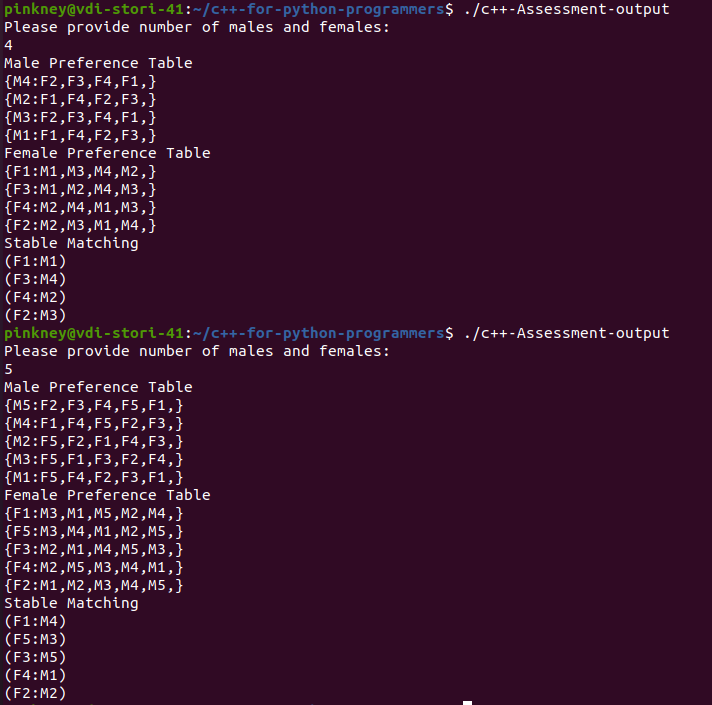






### Additional Discretionary Marks - 5Rs

### Reusable
* I have added comments throughout to describe what is going on
* I have avoided hard coding
* I have provided details of the system that the code has been tested on


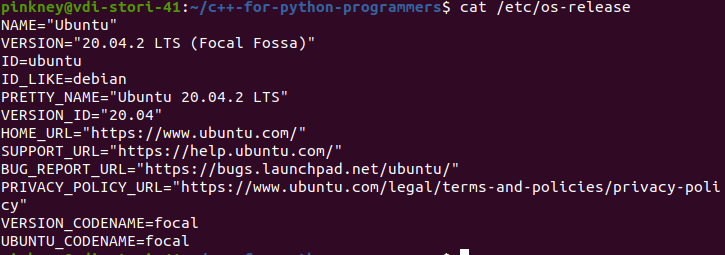

* all of the above mean that the code i have produced is resuable in the sense that it can be easily used and modified by others

### Replicable 
* I have provided a detailed description at the start of the fundamental algorithm function to describe its purpose, inputs, outputs and method. The intention of which is that researchers could read this description, and replicate the behaviour of the function in a programming language of their choice.
* This makes the code replicable in the sense that the description provided of the functions is sufficiently precise and complete to enable any results to be reproducible from scratch.

### Reproducible 
* exact execution used to produce the results is specified
* all results originate from the same and last version of the code
* the code is therefore reproducible since other researchers using the original code and data should be able to obtain the same results

### Re-runnable
* Details are given at the top of the notebook relating to the c++ version 
* Therefore code is re-runnabe in the sense that it describes the execution envirionment in which it is executable, and so can be run again when needed.

